# Padova Emotional Dataset
https://link.springer.com/article/10.3758/s13428-022-01914-4
- Objective: To offer a rich dataset of both genuine (N = 707) and posed (N = 751) emotional expressions for the six universal emotions, using 56 participants.
- Versions: Available in original clips (with participants' body and background) and modified clips (focusing solely on the face).
- Validation: Original dataset validated by 122 human raters and the modified dataset by 280 human raters. Includes hit rates for emotion and genuineness, mean standard deviation of genuineness, and intensity perception for each clip.

## Dataset Creation
- Participants: 57 participants aged 20 to 30, with one withdrawing consent, resulting in contributions from 56 participants.
- Experimental Setup: Designed to record spontaneous emotions with minimal participant awareness of being filmed to preserve natural expressions.
- Emotion Elicitation Procedure: Utilized a multi-modal protocol with videos, games, and other tasks to elicit a range of emotions.

## Supplemental Materials
T1
   - Identification Number: Each subject is assigned a unique identifier.
   - Gender: Marked as F (female) or M (male).
   - PEDFE Code: The first letter indicates the subject's number.
The second letter represents the emotion (d=disgust, h=happiness, f=fear, a=anger, s=surprise, t=sadness).
The third letter denotes whether the emotion is genuine (g) or posed (s).
   - Hit Rate Accuracy Scores: Percentage of raters correctly recognizing the emotion and its authenticity.
   - Intensity: Rated on scales from 0-9.
   - Genuineness Dimensions: Rated on scales from -7 to +7.
   - Duration: Length of each clip in seconds.</br>
   
T2
- Page 1: Emotion Hit Rate
  - Details the average and standard deviation of hit rates for each actor in PEDFE, divided by emotion. This data provides insights into the accuracy of emotion recognition across the dataset.

- Page 2: Genuineness Hit Rate
   - Presents genuineness hit rates for each actor by emotion, including averages and standard deviations. This section highlights how well raters could distinguish between genuine and posed emotions.</br>

T3
- Page 1: Emotion Experience
   - Summarizes the emotions participants reported experiencing for each task, offering a direct view into the emotional impact of the elicitation protocol.

- Page 2: Levels of Genuineness
   - Features ratings from participants on the genuineness of their emotions for each task, ranging from completely not genuine to completely genuine. This self-assessment provides a unique perspective on the authenticity of the expressed emotions.

- Page 3: Intensity Ratings
   - Contains participants' self-rated intensity for each task, on a scale from 0 (none) to 9 (strong). These ratings offer a quantifiable measure of the emotional strength participants felt during each task.

# Py-Feat Tool Box
https://py-feat.org/pages/intro.html

## Initialize a Detector
- Class that is a combination of a Face, Landmark, Action Unit, and Emotion detection model into a single object<br>
- Available models: https://py-feat.org/pages/models.html

In [5]:
from feat import Detector

detector = Detector(
    face_model="retinaface",
    landmark_model="mobilefacenet",
    au_model='xgb',
    emotion_model="resmasknet",
    facepose_model="img2pose",
    device='cuda' #Use GPU Acceleration
)

### Image Recognition

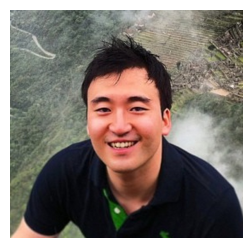

In [2]:
from feat.utils.io import get_test_data_path
from feat.plotting import imshow
import os

# Helper to point to the test data folder
test_data_dir = get_test_data_path()

# Get the full path
single_face_img_path = os.path.join(test_data_dir, "single_face.jpg")

# Plot it
imshow(single_face_img_path)

In [3]:
single_face_prediction = detector.detect_image(single_face_img_path)

# Show results
single_face_prediction

100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,192.504874,140.436884,179.361801,259.297002,0.999708,187.439438,188.309893,190.166301,194.606246,203.551223,...,0.126425,0.00051,0.000026,0.002214,0.991036,0.000028,0.006158,0.000029,c:\Users\Voice\anaconda3\envs\pyfeat\lib\site-...,0


### Video Recognition

In [6]:
detector_vid = Detector(
    face_model="retinaface",
    landmark_model="mobilefacenet",
    au_model='xgb',
    emotion_model="resmasknet",
    facepose_model="img2pose",
    device='cuda' #Use GPU Acceleration
)

### Processing videos
 - https://py-feat.org/basic_tutorials/03_detector_vids.html

In [7]:
from feat.utils.io import get_test_data_path
import os

test_data_dir = get_test_data_path()
test_video_path = os.path.join(test_data_dir, "WolfgangLanger_Pexels.mp4")

# Show video
from IPython.core.display import Video
Video(test_video_path, embed=False)

In [8]:
video_prediction = detector_vid.detect_video(test_video_path, skip_frames=24)
video_prediction.head()

100%|██████████| 20/20 [00:14<00:00,  1.35it/s]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame,approx_time
frame,,,,,,,,,,,,,,,,,,,,,
0,329.866909,42.449663,222.007196,311.066275,0.999792,334.256239,334.890180,339.088102,347.024178,358.605228,...,0.020422,0.003065,0.002329,0.051068,0.273138,0.000503,0.649476,c:\Users\Voice\anaconda3\envs\pyfeat\lib\site-...,0,00:00
24,346.574030,43.976176,217.269203,303.347412,0.999691,350.898606,350.153473,352.905170,359.415899,370.003529,...,0.006582,0.069128,0.001872,0.026793,0.871617,0.000213,0.023797,c:\Users\Voice\anaconda3\envs\pyfeat\lib\site-...,24,00:01
48,337.626183,41.518920,214.170990,284.609768,0.999788,342.273266,339.819092,340.201592,342.913220,350.767214,...,0.000790,0.004627,0.000407,0.000630,0.990020,0.000072,0.003455,c:\Users\Voice\anaconda3\envs\pyfeat\lib\site-...,48,00:02
72,312.570496,60.043016,218.756038,302.480969,0.999268,318.519962,318.278038,321.621016,328.163532,337.982228,...,0.008235,0.003205,0.002155,0.003196,0.965441,0.000238,0.017532,c:\Users\Voice\anaconda3\envs\pyfeat\lib\site-...,72,00:03
96,317.671284,86.260265,232.240851,278.938588,0.998290,336.837802,333.693671,332.629441,336.211014,346.040407,...,0.031638,0.230128,0.005937,0.001021,0.720430,0.001269,0.009577,c:\Users\Voice\anaconda3\envs\pyfeat\lib\site-...,96,00:04
